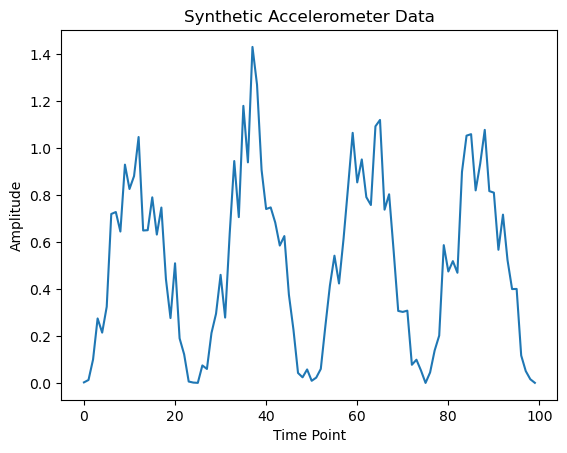

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate synthetic accelerometer data (or load real data)
def generate_time_series_data(num_points=10**2):
    np.random.seed(42)  # For reproducibility
    time_series = (np.sin(np.linspace(0, 4 * np.pi, num_points)) + 0.1 * np.random.randn(num_points))**2
    return time_series

# Plot the generated time series data
time_series = generate_time_series_data()
plt.plot(time_series)
plt.title("Synthetic Accelerometer Data")
plt.xlabel("Time Point")
plt.ylabel("Amplitude")
plt.show()


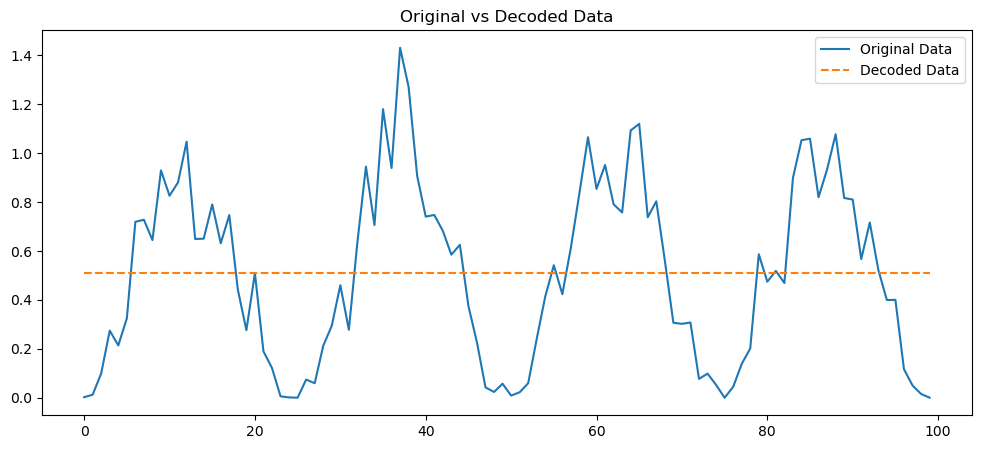

In [2]:
# Recursive encoding function
def recursive_encode(data, threshold=10**3):
    if len(data) <= threshold:
        return [np.mean(data)]  # Encoding with max value as a feature
    
    mid = len(data) // 2
    left_encoded = recursive_encode(data[:mid], threshold)
    right_encoded = recursive_encode(data[mid:], threshold)
    
    return left_encoded + right_encoded

# Updated recursive decoding function to ensure consistent length
def recursive_decode(encoded_data, original_length, threshold=10):
    if len(encoded_data) == 1:
        # Return an array matching the original length
        return [encoded_data[0]] * original_length
    
    half_length = original_length // 2
    left_decoded = recursive_decode(encoded_data[:len(encoded_data)//2], half_length, threshold)
    right_decoded = recursive_decode(encoded_data[len(encoded_data)//2:], original_length - half_length, threshold)
    
    # Combine the left and right parts and ensure the final length matches the original
    combined_decoded = left_decoded + right_decoded
    return combined_decoded[:original_length]  # Trim if necessary

# Test encoding and decoding
encoded = recursive_encode(time_series)
decoded = recursive_decode(encoded, len(time_series))

plt.figure(figsize=(12, 5))
plt.plot(time_series, label="Original Data")
plt.plot(decoded, label="Decoded Data", linestyle='--')
plt.legend()
plt.title("Original vs Decoded Data")
plt.show()


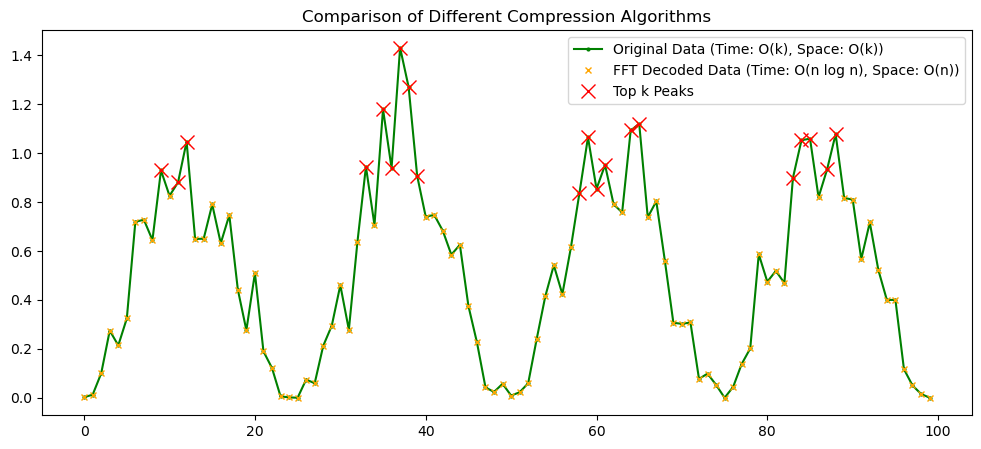

In [3]:
from scipy.fftpack import fft, ifft

# FFT encoding and decoding
def fft_encode(data):
    return fft(data)

def fft_decode(encoded_data):
    return ifft(encoded_data).real

# Test FFT encoding and decoding
fft_encoded = fft_encode(time_series)
fft_decoded = fft_decode(fft_encoded)
# Naive comparison of the decoded data
# Plot the Top 20 peaks of the data as comparative analysis and by top 20 i mean the valued sorting not the index
peak_indices = np.argsort(time_series)[::-1][:20]
# Plot original data and FFT-decoded data
plt.figure(figsize=(12, 5))
plt.plot(time_series, label="Original Data (Time: O(k), Space: O(k))", linestyle='-', marker='o', 
         color='green', markersize=2)
plt.plot(fft_decoded, label="FFT Decoded Data (Time: O(n log n), Space: O(n))", linestyle='', marker='x', 
         color='orange', markersize=5)
plt.plot(peak_indices, time_series[peak_indices], 'x', label="Top k Peaks", color='r', markersize=10)

plt.title("Comparison of Different Compression Algorithms")
plt.legend()
plt.show()

In [4]:
from sklearn.metrics import mean_squared_error
import time

# Function to measure runtime
def measure_runtime(func, *args):
    start_time = time.perf_counter_ns()
    result = func(*args)
    end_time = time.perf_counter_ns()
    return result, end_time - start_time

# Measure performance for both algorithms
_, runtime_recursive = measure_runtime(recursive_encode, time_series)
_, runtime_fft = measure_runtime(fft_encode, time_series)

# Calculate MSE for comparison
mse_recursive = mean_squared_error(time_series, decoded)
mse_fft = mean_squared_error(time_series, fft_decoded)

print(f"Recursive Algorithm Runtime: {runtime_recursive:} seconds, MSE: {mse_recursive:}")
print(f"FFT Algorithm Runtime: {runtime_fft:} seconds, MSE: {mse_fft:}")


Recursive Algorithm Runtime: 48100 seconds, MSE: 0.13270210893334664
FFT Algorithm Runtime: 29200 seconds, MSE: 2.3007195938010459e-32


In [5]:
import sys

# Function to estimate memory usage of an array
def memory_usage(array):
    return sys.getsizeof(array)

# Calculate memory usage for both algorithms
memory_recursive = memory_usage(encoded)
memory_fft = memory_usage(fft_encoded)

print(f"Memory used by recursive algorithm: {memory_recursive} bytes")
print(f"Memory used by FFT algorithm: {memory_fft} bytes")


Memory used by recursive algorithm: 64 bytes
Memory used by FFT algorithm: 1712 bytes


Run Time Comlexity vs Theoretical Curves

In [8]:
# Lets run the encoding and decoding functions on different data sizes and plot the runtime and memory usage
# data_sizes = [1* 10**3,2 * 10**3,2 * 10**3,2 * 10**3,, 10**4, 10**5, 10**6, 10**7]
data_sizes = np.logspace(3, 7, num=20, base=10).astype(int)
recursive_runtimes = []
fft_runtimes = []
recursive_memories = []
fft_memories = []
fft_errors = []
recursive_errors = []
# I wanna make sure that we have the errors analyzed as well
for size in data_sizes:
    print(f"Running for data size {size}")
    time_series = generate_time_series_data(size)
    
    # Recursive algorithm
    _, runtime = measure_runtime(recursive_encode, time_series)
    recursive_runtimes.append(runtime)
    memory = memory_usage(recursive_encode(time_series))
    recursive_memories.append(memory)
    
    # FFT algorithm
    _, runtime = measure_runtime(fft_encode, time_series)
    fft_runtimes.append(runtime)
    memory = memory_usage(fft_encode(time_series))
    fft_memories.append(memory)

    # Decode the data to calculate the MSE
    decoded = recursive_decode(recursive_encode(time_series), size)
    mse_recursive = mean_squared_error(time_series, decoded)
    decoded = fft_decode(fft_encode(time_series))
    mse_fft = mean_squared_error(time_series, decoded)

    fft_errors.append(mse_fft)
    recursive_errors.append(mse_recursive)
    

Running for data size 1000
Running for data size 1623
Running for data size 2636
Running for data size 4281
Running for data size 6951
Running for data size 11288
Running for data size 18329
Running for data size 29763
Running for data size 48329
Running for data size 78475
Running for data size 127427
Running for data size 206913
Running for data size 335981
Running for data size 545559
Running for data size 885866
Running for data size 1438449
Running for data size 2335721
Running for data size 3792690
Running for data size 6158482
Running for data size 10000000


<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
C:\Users\CMME3\AppData\Local\Temp\ipykernel_88904\3354680101.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(data_sizes, nlogn, label="$N \log N$", color='black', linestyle='--', linewidth=2)


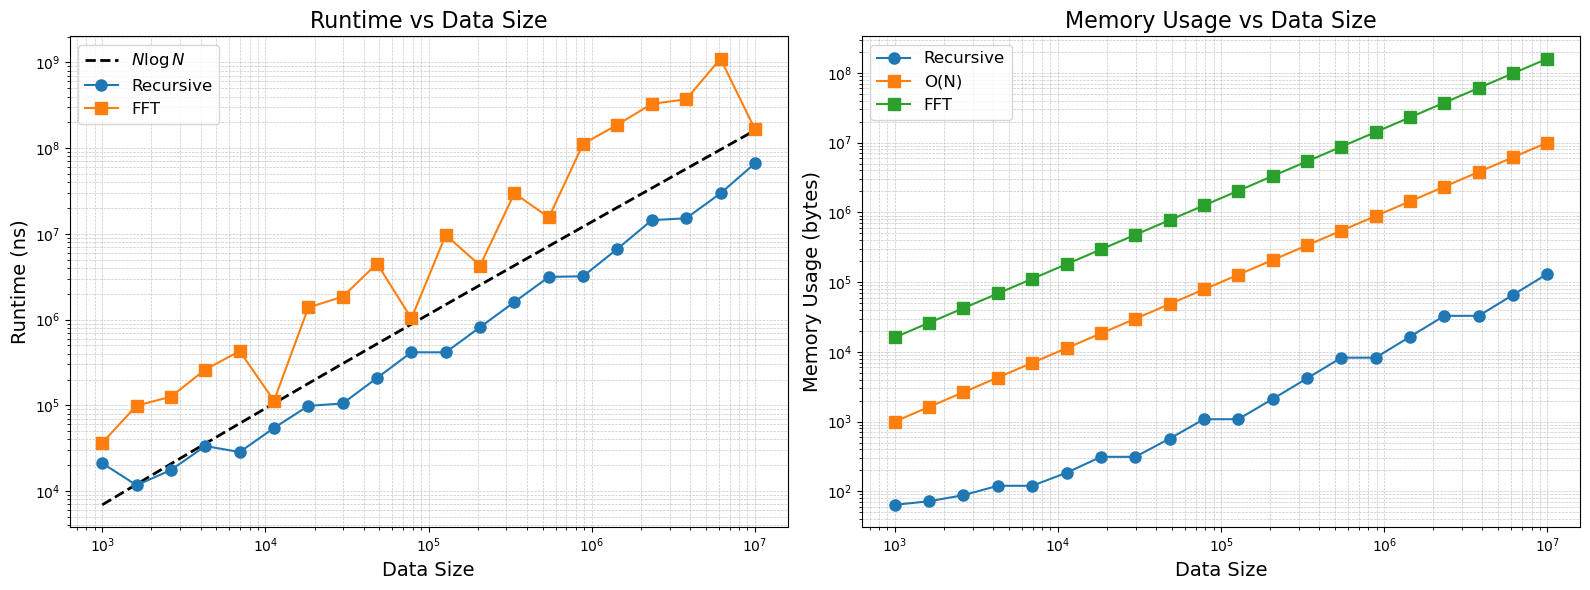

In [7]:
# ------------------ 4. Plotting the Results ------------------
plt.figure(figsize=(16, 6))

# ------------------ Subplot 1: Runtime vs Data Size ------------------
plt.subplot(1, 2, 1)
# Plot the N log N curve for comparison
nlogn = data_sizes * np.log(data_sizes)
plt.plot(data_sizes, nlogn, label="$N \log N$", color='black', linestyle='--', linewidth=2)
plt.plot(data_sizes, recursive_runtimes, label="Recursive", marker='o', linestyle='-', markersize=8)
plt.plot(data_sizes, fft_runtimes, label="FFT", marker='s', linestyle='-', markersize=8)
plt.title("Runtime vs Data Size", fontsize=16)
plt.xlabel("Data Size", fontsize=14)
plt.ylabel("Runtime (ns)", fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)

# ------------------ Subplot 2: Memory Usage vs Data Size ------------------
plt.subplot(1, 2, 2)
plt.plot(data_sizes, recursive_memories, label="Recursive", marker='o', linestyle='-', markersize=8)
plt.plot(data_sizes, data_sizes, label="O(N)", marker='s', linestyle='-', markersize=8)
plt.plot(data_sizes, fft_memories, label="FFT", marker='s', linestyle='-', markersize=8)
plt.title("Memory Usage vs Data Size", fontsize=16)
plt.xlabel("Data Size", fontsize=14)
plt.ylabel("Memory Usage (bytes)", fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.savefig("runtime_memory_comparison.png", dpi=300)
plt.show()

#------------------ Subplot 3: Error vs Data Size ------------------
plt.subplot(1, 3, 3)
plt.plot(data_sizes, recursive_errors, label="Recursive", marker='o', linestyle='-', markersize=8)
plt.plot(data_sizes, fft_errors, label="FFT", marker='s', linestyle='-', markersize=8)
plt.title("Error vs Data Size", fontsize=16)
plt.xlabel("Data Size", fontsize=14)
plt.ylabel("Mean Squared Error", fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.savefig("error_comparison.png", dpi=300)
plt.show()


# Lets test it on Kaggle Datasets

In [ ]:
import pandas as pd
import numpy as np
def func_kaggle(data: np.array, THRESHOLD = 10**3):
    start_time = time.perf_counter_ns()

    encoded = recursive_encode(data,threshold=THRESHOLD)
    decoded = recursive_decode(encoded, len(data),threshold=THRESHOLD)
    end_time = time.perf_counter_ns()
    runtime_gbrt = end_time - start_time
    mse_gbrt = mean_squared_error(data, decoded)
    # print(f"Mean Squared Error: {mse}")
    memory_gbrt = memory_usage(encoded)
    # print(f"Memory used by recursive algorithm: {memory} bytes")
    # _, runtime_gbrt = measure_runtime(recursive_encode, data)
    # print(f"Recursive Algorithm Runtime: {runtime} seconds")
    start_time = time.perf_counter_ns()
    fft_encoded = fft_encode(data)
    fft_decoded = fft_decode(fft_encoded)
    end_time = time.perf_counter_ns()
    runtime_fft = end_time - start_time
    mse_fft = mean_squared_error(data, fft_decoded)
    # print(f"Mean Squared Error: {mse}")
    memory_fft = memory_usage(fft_encoded)
    # print(f"Memory used by fft algorithm: {memory} bytes")
    # _, runtime_fft = measure_runtime(fft_encode, data)
    # print(f"FFT Algorithm Runtime: {runtime} seconds")
    fft_psnr = psnr(data, fft_decoded)
    gbrt_psnr = psnr(data, decoded)
    print("Summary of Results")
    print("------------------")
    print(f"{'':<10}{'Recursive':<20}{'FFT':<20}")
    print(f"{'MSE':<10}{mean_squared_error(data, decoded):<20}{mean_squared_error(data, fft_decoded):<20}")
    print(f"{'PSNR':<10}{gbrt_psnr:<20}{fft_psnr:<20}")
    print(f"{'Memory':<10}{memory_usage(encoded):<20}{memory_usage(fft_encoded):<20}")
    print(f"{'Runtime':<10}{measure_runtime(recursive_encode, data)[1]:<20}{measure_runtime(fft_encode, data)[1]:<20}")
    return mse_fft, mse_gbrt, memory_fft, memory_gbrt, runtime_fft, runtime_gbrt, fft_psnr, gbrt_psnr
def plot_results(pd_results):
    # lets plot the results in which we have 3 subplots for MSE, Memory and Runtime and we compare the two algorithms
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(pd_results["FFT_MSE"], label="FFT")
    plt.plot(pd_results["Recursive_MSE"], label="Recursive")
    plt.title("MSE")
    plt.xlabel("Data Point")
    plt.ylabel("MSE")
    plt.legend()

    plt.yscale('log')

    plt.subplot(1, 3, 2)
    plt.plot(pd_results["FFT_Memory"], label="FFT")
    plt.plot(pd_results["Recursive_Memory"], label="Recursive")
    plt.title("Memory Usage")
    plt.xlabel("Data Point")
    plt.ylabel("Memory Usage")
    plt.legend()
    plt.yscale('log')

    plt.subplot(1, 3, 3)
    plt.plot(pd_results["FFT_Runtime"], label="FFT")
    plt.plot(pd_results["Recursive_Runtime"], label="Recursive")
    plt.title("Runtime")
    plt.xlabel("Data Point")
    plt.ylabel("Runtime")
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    plt.show()
# Lets define a function to calculate the peak signal to noise ratio
def psnr(true, pred):
    mse = mean_squared_error(true, pred)
    return 10 * np.log10(1/mse)

data = pd.read_csv('train.csv')
data.head()
# lets randomly select 1000 rows from the data
data = data.sample(1000)
data = data.dropna()
data = data.reset_index(drop=True)
# lets convert the data to numpy array
data = data.to_numpy()
data = data[:,:-2]
# lets run the function
results = {"FFT_MSE":[], "FFT_Memory":[], "FFT_Runtime":[],
        "Recursive_MSE":[], "Recursive_Memory":[],
        "Recursive_Runtime":[],"Threshold":[],
        "FFT_PSNR":[],"Recursive_PSNR":[]}
# possible_thresholds = [1,data[0].shape[0]//2,data[0].shape[0]/4,data[0].shape[0]/8,data[0].shape[0]/16]
# Generate the possibel thresholds of the data by dividing the data size by 2 so minimum threshold is 1 and maximum is data size
possible_thresholds = np.linspace(1,data[0].shape[0],num=10).astype(int)
possible_thresholds_str = [str(threshold) for threshold in possible_thresholds]
for threshold in possible_thresholds:
    print(f"Running for threshold {threshold}")
    for i in range(100):
        print(f"Running for data point {i}")
        (mse_fft, mse_gbrt, memory_fft,
        memory_gbrt, runtime_fft,
        runtime_gbrt,
        fft_psnr,gbrt_psnr) = func_kaggle(data = data[i,:],
                                    THRESHOLD=threshold)
        results["FFT_MSE"].append(mse_fft)
        results["FFT_Memory"].append(memory_fft)
        results["FFT_Runtime"].append(runtime_fft)
        results["Recursive_MSE"].append(mse_gbrt)
        results["Recursive_Memory"].append(memory_gbrt)
        results["Recursive_Runtime"].append(runtime_gbrt)
        results["Threshold"].append(threshold)
        results["FFT_PSNR"].append(fft_psnr)
        results["Recursive_PSNR"].append(gbrt_psnr)

pd_results = pd.DataFrame(results)
# order the columns
pd_results = pd_results[["Threshold","FFT_MSE","Recursive_MSE","FFT_Memory","Recursive_Memory","FFT_Runtime","Recursive_Runtime","FFT_PSNR","Recursive_PSNR"]]
for threshold in possible_thresholds:
    pd_results[pd_results["Threshold"]==threshold].to_csv(f"results_{threshold}.csv", index=False)
    # plot_results(pd_results = pd_results[pd_results["Threshold"]==threshold])
# pd_results.to_csv("results.csv", index=False)

In [ ]:
grouped

In [ ]:
# Generate the X ticks label for each row such that we have 1 , N/2, N/4, N/8, N/16, N/32, N/64, N/128, N/256, N/512,N
# where N is the data size
# grouped['x_ticks'] = grouped['Threshold'].apply(lambda x: f"{x} ({data[0].shape[0]//x})")

In [ ]:
1# Analyze the results
pd_results['Ratio_MSE'] = pd_results['Recursive_MSE'] / pd_results['FFT_MSE']
pd_results['Ratio_Memory'] = pd_results['Recursive_Memory'] / pd_results['FFT_Memory']
pd_results['Ratio_Runtime'] = pd_results['Recursive_Runtime'] / pd_results['FFT_Runtime']

pd_results.groupby("Threshold").mean()

# Plot the summary in a bar chart in which therea  are two bars in each subplot for the two algorithms

# Set the style for better aesthetics
# plt.style.use('seaborn-darkgrid')
# Group by 'Threshold' and compute mean
grouped = pd_results.groupby('Threshold').mean().reset_index()
# Define the number of subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Define bar width and positions
bar_width = 0.35
indices = np.arange(len(grouped['Threshold']))

# Subplot 1: MSE Comparison
axes[0].bar(indices - bar_width/2, grouped['FFT_MSE'], width=bar_width, label='FFT', color='orange')
axes[0].bar(indices + bar_width/2, grouped['Recursive_MSE'], width=bar_width, label='Recursive', color='green')
axes[0].set_title('MSE Comparison')
axes[0].set_xlabel('Threshold (No of Intervals)')
axes[0].set_ylabel('Mean MSE')
axes[0].set_xticks(indices)
axes[0].set_xticklabels(grouped['Threshold'])
axes[0].set_yscale('log')
axes[0].legend()

# Subplot 2: Memory Comparison
axes[1].bar(indices - bar_width/2, grouped['FFT_Memory'], width=bar_width, label='FFT', color='orange')
axes[1].bar(indices + bar_width/2, grouped['Recursive_Memory'], width=bar_width, label='Recursive', color='green')
axes[1].set_title('Memory Comparison')
axes[1].set_xlabel('Threshold (No of Intervals)')
axes[1].set_ylabel('Mean Memory (Bytes)')
axes[1].set_xticks(indices)
axes[1].set_xticklabels(grouped['Threshold'])
axes[1].legend()

# Subplot 3: Runtime Comparison
axes[2].bar(indices - bar_width/2, grouped['FFT_Runtime'], width=bar_width, label='FFT', color='orange')
axes[2].bar(indices + bar_width/2, grouped['Recursive_Runtime'], width=bar_width, label='Recursive', color='green')
axes[2].set_title('Runtime Comparison')
axes[2].set_xlabel('Threshold (No of Intervals)')
axes[2].set_ylabel('Mean Runtime (seconds)')
axes[2].set_xticks(indices)
axes[2].set_xticklabels(grouped['Threshold'])
axes[2].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.yscale("log")
plt.show()


In [ ]:
data = pd.read_csv('train.csv')
data.shape

In [ ]:
data

In [ ]:

# Plot the summary in a bar chart in which therea  are two bars in each subplot for the two algorithms

# Set the style for better aesthetics
# plt.style.use('seaborn-darkgrid')
# Group by 'Threshold' and compute mean
grouped = pd_results.groupby('Threshold').mean().reset_index()
data_sizes = grouped['Threshold']
recursive_runtimes = grouped['Recursive_Runtime']
fft_runtimes = grouped['FFT_Runtime']
recursive_memories = grouped['Recursive_Memory']
fft_memories = grouped['FFT_Memory']

# ------------------ 4. Plotting the Results ------------------
plt.figure(figsize=(16, 6))

# ------------------ Subplot 1: Runtime vs Data Size ------------------
plt.subplot(1, 2, 1)
# Plot the N log N curve for comparison
nlogn = data_sizes * np.log(data_sizes)
plt.plot(data_sizes, nlogn, label="$N \log N$", color='black', linestyle='--', linewidth=2)
plt.plot(data_sizes, recursive_runtimes, label="Recursive", marker='o', linestyle='-', markersize=8)
plt.plot(data_sizes, fft_runtimes, label="FFT", marker='s', linestyle='-', markersize=8)
plt.title("Runtime vs Data Size", fontsize=16)
plt.xlabel("Threshold", fontsize=14)
plt.ylabel("Runtime (ns)", fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)

# ------------------ Subplot 2: Memory Usage vs Data Size ------------------
plt.subplot(1, 2, 2)
plt.plot(data_sizes, recursive_memories, label="Recursive", marker='o', linestyle='-', markersize=8)
plt.plot(data_sizes, data_sizes, label="O(N)", marker='s', linestyle='-', markersize=8)
plt.plot(data_sizes, fft_memories, label="FFT", marker='s', linestyle='-', markersize=8)
plt.title("Memory Usage vs Data Size", fontsize=16)
plt.xlabel("Threshold", fontsize=14)
plt.ylabel("Memory Usage (bytes)", fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.savefig("runtime_memory_comparison_expt_2.png", dpi=300)
plt.show()

In [ ]:
pd_results

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_results(pd_results, N=1000):
    """
    Plots the MSE, Memory Usage, and Runtime for Recursive Partitioning and FFT-based methods.
    The x-axis is represented as N/k, where k is the threshold.
    
    Parameters:
    - pd_results: pandas DataFrame containing the results.
    - N: The constant value for calculating N/k (default: 1000).
    """
    # Calculate N/k
    pd_results['N_over_k'] = N / pd_results['Threshold']
    
    # Group by 'Threshold' and compute mean
    grouped = pd_results.groupby('Threshold').mean().reset_index()
    
    # Sort by N_over_k for ascending x-axis
    grouped_sorted = grouped.sort_values('N_over_k')
    
    # Define the number of subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # Define bar width and positions
    bar_width = 0.35
    indices = np.arange(len(grouped_sorted['Threshold']))
    
    # Format N/k labels in scientific notation
    nk_labels = ["{:.1e}".format(x) for x in grouped_sorted['N_over_k']]
    
    # Subplot 1: MSE Comparison
    axes[0].bar(indices - bar_width/2, grouped_sorted['FFT_MSE'], width=bar_width, label='FFT', color='tab:orange')
    axes[0].bar(indices + bar_width/2, grouped_sorted['Recursive_MSE'], width=bar_width, label='Recursive', color='tab:green')
    axes[0].set_title('MSE Comparison', fontsize=14)
    axes[0].set_xlabel('$N/k$', fontsize=12)
    axes[0].set_ylabel('Mean MSE', fontsize=12)
    axes[0].set_xticks(indices)
    axes[0].set_xticklabels(nk_labels)
    axes[0].legend(fontsize=10)
    axes[0].grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)
    axes[0].set_yscale('log')  # Log scale for better visibility
    
    # Subplot 2: Memory Comparison
    axes[1].bar(indices - bar_width/2, grouped_sorted['FFT_Memory'], width=bar_width, label='FFT', color='tab:orange')
    axes[1].bar(indices + bar_width/2, grouped_sorted['Recursive_Memory'], width=bar_width, label='Recursive', color='tab:green')
    axes[1].set_title('Memory Usage', fontsize=14)
    axes[1].set_xlabel('$N/k$', fontsize=12)
    axes[1].set_ylabel('Mean Memory Usage (Bytes)', fontsize=12)
    axes[1].set_xticks(indices)
    axes[1].set_xticklabels(nk_labels)
    axes[1].legend(fontsize=10)
    axes[1].grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)
    axes[1].set_yscale('log')  # Log scale
    
    # Subplot 3: Runtime Comparison
    axes[2].bar(indices - bar_width/2, grouped_sorted['FFT_Runtime'], width=bar_width, label='FFT', color='tab:orange')
    axes[2].bar(indices + bar_width/2, grouped_sorted['Recursive_Runtime'], width=bar_width, label='Recursive', color='tab:green')
    axes[2].set_title('Runtime Comparison', fontsize=14)
    axes[2].set_xlabel('$N/k$', fontsize=12)
    axes[2].set_ylabel('Mean Runtime (seconds)', fontsize=12)
    axes[2].set_xticks(indices)
    axes[2].set_xticklabels(nk_labels)
    axes[2].legend(fontsize=10)
    axes[2].grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)
    axes[2].set_yscale('log')  # Log scale
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.savefig("runtime_memory_comparison_real_dataset.png", dpi=300)
    plt.show()
plot_results(pd_results = pd_results, N=561)


# Experimentation on Sparse and Intermittent Time Series

In [101]:
# Generate the intermittent data in which data length is large but the data consists of lots of zeros adn there are few non zero values
data = np.zeros((1000, 10000))
# lets fill the data with some random values in more efficient way
data[:, np.random.randint(0, 10000, 1000)] = np.random.rand(1000)

# lets run the function
results = {"FFT_MSE":[], "FFT_Memory":[], "FFT_Runtime":[],
        "Recursive_MSE":[], "Recursive_Memory":[],
        "Recursive_Runtime":[],"Threshold":[],
        "FFT_PSNR":[],"Recursive_PSNR":[]}

possible_thresholds = [1, 10, 100, 500, 1000,2000,5000,10000]
for threshold in possible_thresholds:
    print(f"Running for threshold {threshold}")
    for i in range(1000):
        print(f"Running for data point {i}")
        (mse_fft, mse_gbrt, memory_fft,
        memory_gbrt, runtime_fft,
        runtime_gbrt,
        fft_psnr,gbrt_psnr) = func_kaggle(data = data[i,:],
                                    THRESHOLD=threshold)
        results["FFT_MSE"].append(mse_fft)
        results["FFT_Memory"].append(memory_fft)
        results["FFT_Runtime"].append(runtime_fft)
        results["Recursive_MSE"].append(mse_gbrt)
        results["Recursive_Memory"].append(memory_gbrt)
        results["Recursive_Runtime"].append(runtime_gbrt)
        results["Threshold"].append(threshold)
        results["FFT_PSNR"].append(fft_psnr)
        results["Recursive_PSNR"].append(gbrt_psnr)

pd_results = pd.DataFrame(results)
# order the columns
pd_results = pd_results[["Threshold","FFT_MSE","Recursive_MSE","FFT_Memory","Recursive_Memory","FFT_Runtime","Recursive_Runtime","FFT_PSNR","Recursive_PSNR"]]
for threshold in possible_thresholds:
    pd_results[pd_results["Threshold"]==threshold].to_csv(f"results_{threshold}.csv", index=False)
    plot_results(pd_results = pd_results[pd_results["Threshold"]==threshold])
# pd_results.to_csv("results.csv", index=False)

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55500               61300               
Running for data point 110
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54700               62400               
Running for data point 111
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54600               60700               
Running for data point 112
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56500               71600               
Running for data point 116
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   66700               78900               
Running for data point 117
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   57400               65600               
Running for data point 118
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55700               65100               
Running for data point 122
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   80600               94200               
Running for data point 123
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   61400               66700               
Running for data point 124
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   61200               65300               
Running for data point 128
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55700               63700               
Running for data point 129
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54600               62900               
Running for data point 130
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   59100               68700               
Running for data point 134
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54500               63400               
Running for data point 135
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55300               61600               
Running for data point 136
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55600               67100               
Running for data point 141
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   85500               98800               
Running for data point 142
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56100               61000               
Running for data point 143
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55800               64200               
Running for data point 147
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54400               57500               
Running for data point 148
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55700               63800               
Running for data point 149
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55300               61900               
Running for data point 153
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55000               57800               
Running for data point 154
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54700               56400               
Running for data point 155
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   57400               67900               
Running for data point 160
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55400               61400               
Running for data point 161
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55200               57500               
Running for data point 162
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56600               62100               
Running for data point 166
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54400               63300               
Running for data point 167
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   57300               66500               
Running for data point 168
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   58800               68500               
Running for data point 172
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55900               61500               
Running for data point 173
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54400               61700               
Running for data point 174
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55200               67000               
Running for data point 179
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54300               61100               
Running for data point 180
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54400               66800               
Running for data point 181
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56800               67600               
Running for data point 186
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56900               76100               
Running for data point 187
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55100               60900               
Running for data point 188
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55600               64700               
Running for data point 192
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56600               70800               
Running for data point 193
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55900               71200               
Running for data point 194
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   57400               67900               
Running for data point 198
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54700               64200               
Running for data point 199
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55500               62400               
Running for data point 200
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56800               64100               
Running for data point 204
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55700               68500               
Running for data point 205
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55300               74500               
Running for data point 206
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56000               63400               
Running for data point 211
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55700               61200               
Running for data point 212
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54900               61900               
Running for data point 213
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56500               70000               
Running for data point 218
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54800               66800               
Running for data point 219
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55800               65700               
Running for data point 220
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56200               68500               
Running for data point 224
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56000               68700               
Running for data point 225
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55500               61900               
Running for data point 226
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55600               66400               
Running for data point 230
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56000               65800               
Running for data point 231
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56000               64900               
Running for data point 232
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56000               65100               
Running for data point 236
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55300               62300               
Running for data point 237
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   58300               63800               
Running for data point 238
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56500               68700               
Running for data point 242
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   59600               62300               
Running for data point 243
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   57500               58000               
Running for data point 244
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   57300               61700               
Running for data point 248
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56600               61100               
Running for data point 249
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55000               56100               
Running for data point 250
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56900               77700               
Running for data point 254
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55400               58100               
Running for data point 255
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55300               62800               
Running for data point 256
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56500               62400               
Running for data point 260
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54200               56200               
Running for data point 261
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55100               64600               
Running for data point 262
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   60900               64500               
Running for data point 266
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56000               61900               
Running for data point 267
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54300               64800               
Running for data point 268
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55900               65200               
Running for data point 272
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55300               61300               
Running for data point 273
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56000               57300               
Running for data point 274
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55400               64300               
Running for data point 284
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55400               67800               
Running for data point 285
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54100               63000               
Running for data point 286
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56600               62500               
Running for data point 290
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55700               63900               
Running for data point 291
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55600               66000               
Running for data point 292
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   59100               72100               
Running for data point 296
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56000               63200               
Running for data point 297
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54500               61100               
Running for data point 298
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56000               70300               
Running for data point 302
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54600               64800               
Running for data point 303
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54600               61300               
Running for data point 304
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56800               62900               
Running for data point 309
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55800               64900               
Running for data point 310
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56700               67300               
Running for data point 311
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56100               67700               
Running for data point 315
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   76500               69000               
Running for data point 316
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56400               64200               
Running for data point 317
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   60200               62200               
Running for data point 322
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   95100               103900              
Running for data point 323
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54800               65200               
Running for data point 324
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56500               66200               
Running for data point 328
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55500               63100               
Running for data point 329
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54200               61100               
Running for data point 330
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54400               65100               
Running for data point 335
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54900               62600               
Running for data point 336
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   61100               57600               
Running for data point 337
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56000               73500               
Running for data point 342
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56300               68300               
Running for data point 343
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55700               62900               
Running for data point 344
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   63300               81600               
Running for data point 348
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54300               55400               
Running for data point 349
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56100               58300               
Running for data point 350
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55500               62000               
Running for data point 354
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54700               60200               
Running for data point 355
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54100               58200               
Running for data point 356
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   57800               70800               
Running for data point 361
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54700               61700               
Running for data point 362
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55500               58900               
Running for data point 363
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55500               61600               
Running for data point 368
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54900               62800               
Running for data point 369
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   74900               74000               
Running for data point 370
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55400               68600               
Running for data point 374
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56500               67600               
Running for data point 375
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56200               56800               
Running for data point 376
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55600               60300               
Running for data point 381
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54900               60700               
Running for data point 382
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54600               59500               
Running for data point 383
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55600               63500               
Running for data point 388
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56000               67700               
Running for data point 389
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56700               64700               
Running for data point 390
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   59600               60300               
Running for data point 394
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   84900               83300               
Running for data point 395
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54600               56500               
Running for data point 396
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   57700               62300               
Running for data point 400
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56000               63400               
Running for data point 401
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54900               59300               
Running for data point 402
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   57900               66700               
Running for data point 407
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   57700               65200               
Running for data point 408
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55100               64400               
Running for data point 409
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55200               69800               
Running for data point 413
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54300               66300               
Running for data point 414
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55000               62300               
Running for data point 415
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55000               66400               
Running for data point 419
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   57000               70300               
Running for data point 420
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55700               62200               
Running for data point 421
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56400               59800               
Running for data point 425
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55700               60400               
Running for data point 426
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56600               64800               
Running for data point 427
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   58200               67200               
Running for data point 431
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   61200               80600               
Running for data point 432
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   59900               67500               
Running for data point 433
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56300               68100               
Running for data point 437
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   57600               64000               
Running for data point 438
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55300               62800               
Running for data point 439
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54800               66300               
Running for data point 443
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56300               62700               
Running for data point 444
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54600               62800               
Running for data point 445
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56400               63800               
Running for data point 450
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   53800               61300               
Running for data point 451
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   59800               73700               
Running for data point 452
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56300               63100               
Running for data point 457
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54800               66000               
Running for data point 458
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55100               62200               
Running for data point 459
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56300               65700               
Running for data point 464
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56500               66800               
Running for data point 465
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55400               61700               
Running for data point 466
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   106100              100900              
Running for data point 471
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56200               72000               
Running for data point 472
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55800               68500               
Running for data point 473
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   57800               77200               
Running for data point 478
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55200               78100               
Running for data point 479
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55200               61400               
Running for data point 480
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   60600               63700               
Running for data point 485
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54900               63300               
Running for data point 486
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55700               61500               
Running for data point 487
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55200               65200               
Running for data point 491
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   53800               56200               
Running for data point 492
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54600               68600               
Running for data point 493
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55800               65400               
Running for data point 498
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54900               65200               
Running for data point 499
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   58800               60000               
Running for data point 500
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   57200               65300               
Running for data point 504
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55300               64800               
Running for data point 505
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54000               56300               
Running for data point 506
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56000               65100               
Running for data point 511
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54900               61600               
Running for data point 512
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54700               62300               
Running for data point 513
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56200               68600               
Running for data point 517
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   57000               71300               
Running for data point 518
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54500               63100               
Running for data point 519
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56900               67200               
Running for data point 524
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56000               66900               
Running for data point 525
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55200               66100               
Running for data point 526
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56700               61300               
Running for data point 530
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   74600               74400               
Running for data point 531
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55500               67200               
Running for data point 532
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55600               64800               
Running for data point 536
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54700               62900               
Running for data point 537
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54300               61400               
Running for data point 538
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\30

Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56400               67600               
Running for data point 542
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   74900               67700               
Running for data point 543
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55600               56900               
Running for data point 544
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56600               66500               
Running for data point 549
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54900               66200               
Running for data point 550
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   55600               66200               
Running for data point 551
Summary of Results
---------------

C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)
C:\Users\CMME3\AppData\Local\Temp\ipykernel_77048\3096243896.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10(1/mse)


Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   56400               61300               
Running for data point 555
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   58400               82100               
Running for data point 556
Summary of Results
------------------
          Recursive           FFT                 
MSE       0.0                 4.7819878058474835e-33
PSNR      inf                 323.2039153567735   
Memory    80056               160112              
Runtime   54600               64000               
Running for data point 557
Summary of Results
---------------

KeyboardInterrupt: 

In [ ]:
# Analyze the results
pd_results['Ratio_MSE'] = pd_results['Recursive_MSE'] / pd_results['FFT_MSE']
pd_results['Ratio_Memory'] = pd_results['Recursive_Memory'] / pd_results['FFT_Memory']
pd_results['Ratio_Runtime'] = pd_results['Recursive_Runtime'] / pd_results['FFT_Runtime']

pd_results.groupby("Threshold").median()

In [ ]:
# Plot the accelerometer data for 1 signal
plt.plot(data[0])
plt.title("Accelerometer Data")
plt.xlabel("Time Point")
plt.ylabel("Amplitude")
plt.show()
